**케라스와 텐서플로 소개**

**텐서플로란?**

**케라스란?**

**케라스와 텐서플로의 간략한 역사**

**딥러닝 작업 환경 설정하기**

**주피터 노트북: 권장하는 딥러닝 실험 도구**

**코랩 사용하기**

**코랩 시작하기**

**pip로 패키지 설치하기**

**GPU 런타임 사용하기**

상수 텐서와 변수

**모두 1 또는 모두 0인 텐서**

In [43]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


랜덤 텐서

In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.7305164]
 [ 0.687261 ]
 [-0.5144001]], shape=(3, 1), dtype=float32)


In [ ]:
# 균일 분포(uniform distribution)에서 랜덤한 값들을 생성
# 딥러닝 모델을 초기화하거나 랜덤한 텐서를 생성하는데 유용하게 사용
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.7144462 ]
 [0.11816823]
 [0.3405099 ]], shape=(3, 1), dtype=float32)


넘파이 배열에 값 할당하기

In [ ]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
x

array([[0., 1.],
       [1., 1.]])

In [ ]:
# 텐서플로우 텐서에 값을 할당하지 못함 -> 변수를 만들려면 랜덤 텐서와 같이 초깃값을 제공해야 함
x = tf.ones(shape=(2, 2))
x[0,0] = 0.

TypeError: ignored

텐서플로 변수 만들기

In [ ]:
# tf.Variable은 수정 가능한 상태를 관리하기 위한 클래스
import tensorflow as tf
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.8705862 ],
       [0.6796975 ],
       [0.98913586]], dtype=float32)>


텐서플로 변수에 값 할당하기

In [ ]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

변수 일부에 값 할당하기



In [ ]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
# assign_add() : += 와 동일
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

텐서 연산: 텐서플로에서 수학 계산하기


**기본적인 수학 연산**

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)

In [ ]:
print(a)
print(b)
print(c)
print(d)
print(e)
e *= d
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


# **GradientTape API 다시 살펴 보기**
**GradientTape 사용하기**

- GradientTape은 TensorFlow의 핵심 기능 중 하나로, 자동 미분을 수행하기 위해 사용되는 도구입니다.
- TensorFlow는 그래디언트(gradient)를 계산하는 데에 GradientTape을 활용하여 연산 과정을 기록

In [46]:
# TensorFlow를 사용하여 변수 input_var의 제곱에 대한 그래디언트(기울기)를 계산
# 'result'는 'input_var'의 제곱이므로, 이 미분값은 2 * input_var가 됩니다. input_var의 초기값이 3이므로, gradient는 6
input_var = tf.Variable(initial_value=3.)
# tf.GradientTape()를 사용하여 GradientTape 컨텍스트를 생성합니다. 이제부터 tape를 사용하여 연산을 기록
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var) # tape.gradient()를 사용하여 result에 대한 input_var의 그래디언트를 계산

In [47]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [50]:
# 그래디언트를 계산하려면 미분 대상이 되는 텐서가 관찰 대상으로 지정되어야 하는데, TensorFlow 변수는
# 기본적으로 자동으로 관찰 대상이 됩니다.
# 그러나 상수나 일반 텐서는 그렇지 않기 때문에, 이들에 대해 그래디언트를 계산하려면 먼저 tape.watch() 함수를 사용하여
# 그 텐서를 관찰 대상으로 지정
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const) # 여기서 미분하는 것은 상수가 아니라 상수 값을 가진 텐서에 대한 함수

In [51]:

gradient

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

# 물리학에서 위치, 속도, 그리고 가속도는 서로 미분과 적분을 통해 연결
- 위치(position)는 시간에 대해 미분하면 속도(velocity)가 된다. 이는 위치가 시간에 따라 어떻게 변하는지를 나타내며, 이 변화율이 바로 속도이다. 즉, 위치의 그레디언트(미분값)는 속도이다.
- 속도를 시간에 대해 미분하면 가속도(acceleration)가 된다. 속도가 시간에 따라 어떻게 변하는지를 나타내며, 이 변화율이 바로 가속도이다. 즉, 속도의 그레디언트(미분값)는 가속도이다.
- 따라서, 위치의 두 번째 시간에 대한 미분값(이계도 그레디언트)은 가속도가 된다.


# 그레이디언트 테이프를 중첩하여 이계도 그레이디언트를 계산하기
- TensorFlow를 사용하여 시간(time)에 따른 위치(position)와 속도(speed)의 변화를 모델링하고, 그에 대한 가속도(acceleration)를 계산하는 예시
- 첫 번째 줄에서는 TensorFlow 변수 time을 생성하고, 초기값을 0.0으로 설정.
- 두 번째 줄에서는 tf.GradientTape()를 사용하여 outer_tape라는 GradientTape 컨텍스트를 생성합니다. outer_tape를 사용하여 가속도에 대한 그래디언트를 계산.
- 세 번째 줄에서는 inner_tape라는 또 다른 GradientTape 컨텍스트를 생성합니다. inner_tape를 사용하여 위치에 대한 그래디언트를 계산.
- 네 번째 줄에서는 position 변수에 4.9 * time ** 2의 연산 결과를 할당합니다. 이 때, 이 연산은 inner_tape 컨텍스트 내에서 기록.
- 다섯 번째 줄에서는 inner_tape.gradient()를 사용하여 position에 대한 time의 그래디언트를 계산합니다. 이를 통해 위치에 대한 시간의 변화율, 즉 속도를 구한다.
- 여섯 번째 줄에서는 outer_tape.gradient()를 사용하여 speed에 대한 time의 그래디언트를 계산합니다. 이를 통해 속도에 대한 시간의 변화율, 즉 가속도를 구한다.

따라서 acceleration에는 time에 대한 speed의 그래디언트가 저장된다. 결과적으로, 이 코드는 시간에 따른 위치를 모델링하고, 이를 기반으로 속도와 가속도를 계산한다. time 변수의 값이 변할 때 위치, 속도 및 가속도의 변화율을 계산하여 모델을 업데이트할 수 있다.

In [63]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [60]:
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

In [64]:
speed

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

엔드-투-엔드 예제: 텐서플로 선형 분류기

**2D 평면에 두 클래스의 랜덤한 포인트 생성하기**

In [ ]:
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**두 클래스를 (2000, 2) 크기의 한 배열로 쌓기**

In [ ]:
# np.vstack() 함수는 주어진 배열들을 수직으로 쌓아 하나의 배열로 합친다.
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs

array([[-1.0923913 ,  2.054911  ],
       [ 0.97686684,  2.5478845 ],
       [ 0.66970205,  2.6154718 ],
       ...,
       [ 3.499451  , -0.5666612 ],
       [ 1.3039314 , -0.17586589],
       [ 2.3260016 , -0.54439116]], dtype=float32)

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [ ]:

targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

두 클래스의 포인트를 그래프로 그리기

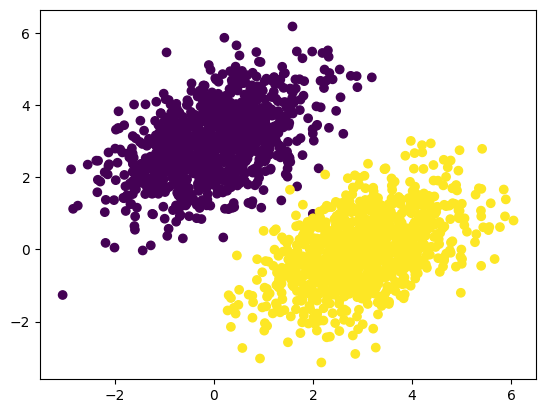

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0]) # targets 배열의 첫 번째 열의 값에 따라 데이터 포인트의 색상을 지정
plt.show()

선형 분류기의 변수 만들기

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [ ]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

정방향 패스 함수

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

평균 제곱 오차 손실 함수

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**훈련 스텝 함수**

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**배치 훈련 루프**

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 1.4080
1번째 스텝의 손실: 0.2697
2번째 스텝의 손실: 0.1288
3번째 스텝의 손실: 0.1051
4번째 스텝의 손실: 0.0966
5번째 스텝의 손실: 0.0903
6번째 스텝의 손실: 0.0848
7번째 스텝의 손실: 0.0798
8번째 스텝의 손실: 0.0752
9번째 스텝의 손실: 0.0710
10번째 스텝의 손실: 0.0672
11번째 스텝의 손실: 0.0637
12번째 스텝의 손실: 0.0605
13번째 스텝의 손실: 0.0575
14번째 스텝의 손실: 0.0548
15번째 스텝의 손실: 0.0523
16번째 스텝의 손실: 0.0501
17번째 스텝의 손실: 0.0480
18번째 스텝의 손실: 0.0461
19번째 스텝의 손실: 0.0444
20번째 스텝의 손실: 0.0428
21번째 스텝의 손실: 0.0413
22번째 스텝의 손실: 0.0400
23번째 스텝의 손실: 0.0388
24번째 스텝의 손실: 0.0376
25번째 스텝의 손실: 0.0366
26번째 스텝의 손실: 0.0357
27번째 스텝의 손실: 0.0348
28번째 스텝의 손실: 0.0340
29번째 스텝의 손실: 0.0333
30번째 스텝의 손실: 0.0327
31번째 스텝의 손실: 0.0321
32번째 스텝의 손실: 0.0315
33번째 스텝의 손실: 0.0310
34번째 스텝의 손실: 0.0305
35번째 스텝의 손실: 0.0301
36번째 스텝의 손실: 0.0297
37번째 스텝의 손실: 0.0294
38번째 스텝의 손실: 0.0291
39번째 스텝의 손실: 0.0288


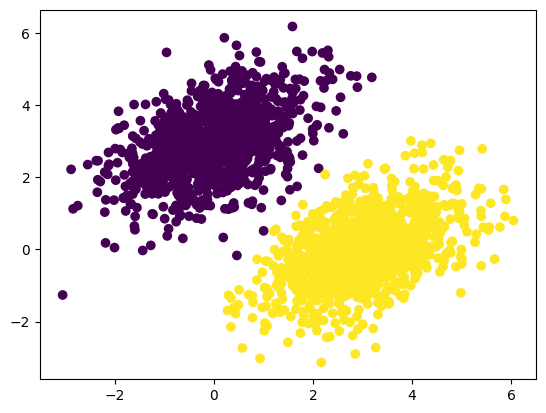

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
# 불린 배열은 색상 맵(color map)을 사용하여 색상으로 변환되며, 결과적으로 이는 모델의 예측 값이 0.5보다
# 큰 샘플과 작은 샘플을 다른 색으로 표시
plt.show()

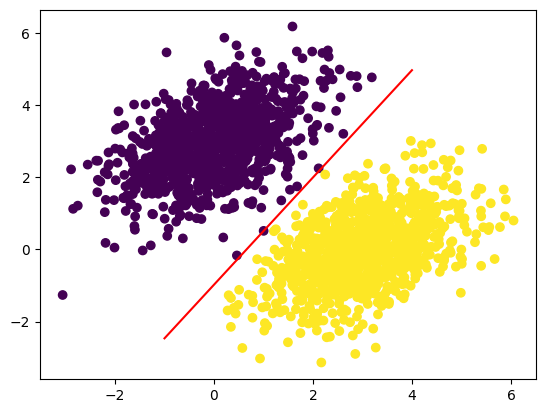

In [ ]:
x = np.linspace(-1, 4, 100) # -1에서 4까지의 범위에서 균일하게 간격을 둔 100개의 숫자를 생성
# 사실 100개의 x 축 좌표를 만들 필요 없이 시작과 종료 위치만 있어도 됩니다.
# x = [-1, 4]
# 생성한 x값에 대한 결정 경계의 y좌표를 계산
#  W[0] / W[1] * x 부분은 입력 데이터의 첫 번째 특성(x좌표)에 대한 가중치와 두 번째 특성(y좌표)에 대한 가중치의 비율
# (0.5 - b) / W[1] 부분은 결정 경계가 y축을 어디에서 절편하는지를 결정
y = - W[0] /  W[1] * x + (0.5 - b) / W[1] # W는 분류기의 가중치이고, b는 편향입니다.
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

# **과제_0703: 핵심 Keras API 이해하기 내용을 코드로 작성하고 설명해보세요.**
# 층: 딥러닝의 구성 요소
케라스의 Layer 클래스

Layer의 서브클래스로 구현한 Dense 층

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


자동 크기 추론: 동적으로 층 만들기

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

# 층에서 모델로

# “컴파일” 단계: 학습 과정 설정

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
# 매개변수를 인스턴스 객체로 지정할 수도 있음
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

# 손실 함수 선택하기

**fit() 메서드 이해하기**

**넘파이 데이터로 fit() 메서드 호출하기**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 1s 3ms/step - loss: 3.0212 - binary_accuracy: 0.6985
Epoch 2/5
16/16 [==============================] - 0s 4ms/step - loss: 2.7837 - binary_accuracy: 0.7160
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 2.5903 - binary_accuracy: 0.7370
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 2.4110 - binary_accuracy: 0.7545
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 2.2411 - binary_accuracy: 0.7700


In [ ]:
history.history

{'loss': [3.021212100982666,
  2.783684492111206,
  2.5903351306915283,
  2.4110267162323,
  2.2411301136016846],
 'binary_accuracy': [0.6984999775886536,
  0.7160000205039978,
  0.7369999885559082,
  0.7544999718666077,
  0.7699999809265137]}

# 검증 데이터에서 손실과 측정 지표 모니터링하기

validation_data 매개변수 사용하기

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])
 # 입력 배열의 길이(len(inputs))에 해당하는 정수들의 무작위 순열(permutation)을 생성
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 8ms/step - loss: 0.3918 - binary_accuracy: 0.8650 - val_loss: 0.0711 - val_binary_accuracy: 1.0000
Epoch 2/5
88/88 [==============================] - 0s 5ms/step - loss: 0.0692 - binary_accuracy: 0.9600 - val_loss: 0.1082 - val_binary_accuracy: 0.8483
Epoch 3/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0744 - binary_accuracy: 0.9571 - val_loss: 0.0272 - val_binary_accuracy: 1.0000
Epoch 4/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0687 - binary_accuracy: 0.9614 - val_loss: 0.0688 - val_binary_accuracy: 0.9983
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0755 - binary_accuracy: 0.9521 - val_loss: 0.2702 - val_binary_accuracy: 0.4850


**추론: 훈련한 모델 사용하기**

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 2ms/step
[[0.278302  ]
 [0.33944282]
 [0.41956067]
 [0.17839324]
 [0.11344239]
 [0.08530106]
 [0.11536559]
 [0.22764184]
 [0.33914068]
 [0.26060048]]
